In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer
from utils.monte_carlo_resampling_operator import MonteCarloResamplingOperator

In [2]:
animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
result[0]
#TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
shuffle_calculator = result[0]
df_index = list(range(len(shuffle_calculator.shuffle_dfs)))
df_columns = list(range(len(shuffle_calculator.shuffle_dfs[0].columns) ** 2))
df = pd.DataFrame(index=df_index, columns=df_columns)
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for index, shuffle_df in enumerate(shuffle_calculator.shuffle_dfs):
    df.iloc[index, :] = shuffle_df.to_numpy().ravel()
    
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.376138,0.02271,-0.000149,-0.000108,-0.007284,-0.006658,-0.002893,0.018875,0.003472,-0.004218,...,0.007546,0.02362,-0.0022,0.086124,-0.003992,-0.006651,0.003566,-0.004613,0.001179,0.402015
1,0.474604,0.019179,0.000542,0.005008,-0.012158,0.008746,0.005539,0.065114,0.055529,0.050857,...,0.007334,0.055732,-0.014199,0.01135,0.032102,0.02993,-0.009906,-0.003856,0.087517,0.451763
2,0.495088,-0.006628,-0.010192,0.000778,0.002628,0.004541,0.007085,-0.011712,0.04336,0.054938,...,0.003414,0.006031,0.026801,0.027514,0.026773,-0.002477,-0.007346,0.030745,-0.009769,0.404895
3,0.549929,-0.01433,-0.012515,0.012641,-0.00403,-0.001289,-0.018645,0.010441,0.019013,0.045968,...,0.003846,0.004614,-0.008617,-0.004168,0.000724,-0.003996,0.002297,-0.004463,-0.001996,0.355346
4,0.537632,-0.004746,0.010851,0.007227,0.003082,-0.006511,-0.010771,-0.005207,-0.000028,0.008735,...,0.025302,0.055225,-0.008385,0.010081,0.043813,-0.007206,-0.007446,-0.001111,-0.010755,0.543525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.411265,-0.009295,-0.00987,-0.001875,0.010914,0.018055,-0.009354,-0.008835,0.019652,-0.006518,...,0.006887,0.113063,0.046981,0.010903,-0.010297,0.030736,0.002925,0.135204,-0.00153,0.587579
996,0.486566,-0.004211,-0.007519,0.005725,0.006076,-0.000277,-0.007107,-0.001574,0.012408,0.007413,...,0.026818,0.029215,-0.01134,0.011744,-0.010811,-0.014699,0.015422,-0.002251,0.0085,0.399058
997,0.345886,0.034576,0.002373,0.004514,-0.013913,0.010087,-0.008044,-0.004758,0.052301,-0.003619,...,0.027629,-0.005732,-0.012633,0.038986,-0.002199,0.052584,-0.013926,0.007682,0.002412,0.345268
998,0.456689,0.057755,-0.005421,0.008229,0.038526,0.001664,0.025682,-0.011565,0.02442,0.074905,...,0.02749,-0.001574,0.098153,0.038892,0.002737,-0.010349,0.068985,0.052142,-0.000127,0.444263


(array([  6.,   2.,  15.,  48.,  50.,  87., 112., 113., 129., 111.,  87.,
         76.,  58.,  35.,  39.,  15.,   8.,   6.,   1.,   2.]),
 array([0.289600218635198, 0.30845781558761404, 0.32731541254003,
        0.346173009492446, 0.36503060644486196, 0.38388820339727797,
        0.402745800349694, 0.42160339730210994, 0.44046099425452595,
        0.45931859120694196, 0.4781761881593579, 0.49703378511177393,
        0.5158913820641899, 0.5347489790166059, 0.5536065759690219,
        0.5724641729214379, 0.5913217698738539, 0.6101793668262698,
        0.6290369637786859, 0.6478945607311019, 0.6667521576835178],
       dtype=object),
 <BarContainer object of 20 artists>)

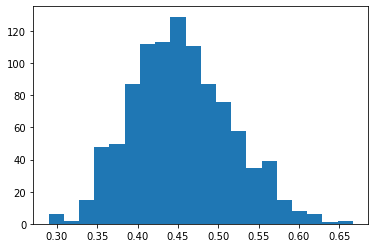

In [5]:
plt.hist(df.iloc[:, 0], bins=20)

(array([171., 229., 166., 107., 103.,  63.,  33.,  30.,  23.,  15.,  21.,
         13.,  10.,   3.,   2.,   6.,   0.,   1.,   1.,   3.]),
 array([-0.01802265761454341, -0.0082631483284508, 0.0014963609576418117,
        0.011255870243734423, 0.021015379529827034, 0.03077488881591964,
        0.04053439810201226, 0.050293907388104866, 0.060053416674197474,
        0.06981292596029008, 0.07957243524638269, 0.08933194453247531,
        0.09909145381856792, 0.10885096310466053, 0.11861047239075315,
        0.12836998167684574, 0.13812949096293836, 0.14788900024903098,
        0.15764850953512358, 0.1674080188212162, 0.17716752810730882],
       dtype=object),
 <BarContainer object of 20 artists>)

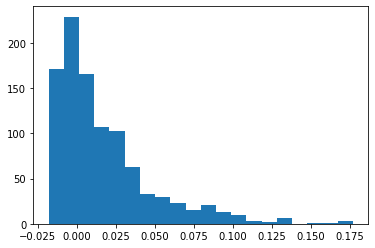

In [6]:
plt.hist(df.iloc[:, 1], bins=20)

(array([ 47., 231., 303., 177., 106.,  45.,  40.,  15.,  13.,   9.,   7.,
          3.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([-0.021313229212878853, -0.01391862904575103, -0.006524028878623205,
        0.00087057128850462, 0.008265171455632443, 0.015659771622760266,
        0.023054371789888093, 0.030448971957015913, 0.03784357212414374,
        0.045238172291271556, 0.05263277245839938, 0.06002737262552721,
        0.06742197279265504, 0.07481657295978286, 0.08221117312691067,
        0.0896057732940385, 0.09700037346116633, 0.10439497362829415,
        0.11178957379542197, 0.11918417396254981, 0.12657877412967763],
       dtype=object),
 <BarContainer object of 20 artists>)

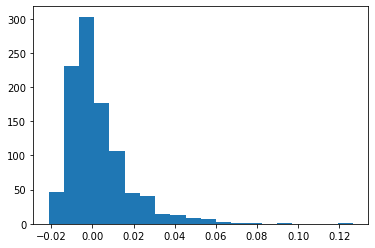

In [7]:
plt.hist(df.iloc[:, 2], bins=20)

(array([130., 287., 231., 139.,  81.,  49.,  31.,  18.,  13.,  11.,   3.,
          3.,   2.,   0.,   2.]),
 array([-0.01796841183505392, -0.0095687260447059, -0.0011690402543578816,
        0.007230645535990135, 0.015630331326338155, 0.024030017116686175,
        0.03242970290703419, 0.04082938869738221, 0.04922907448773023,
        0.05762876027807824, 0.06602844606842627, 0.07442813185877428,
        0.0828278176491223, 0.09122750343947032, 0.09962718922981834,
        0.10802687502016634], dtype=object),
 <BarContainer object of 15 artists>)

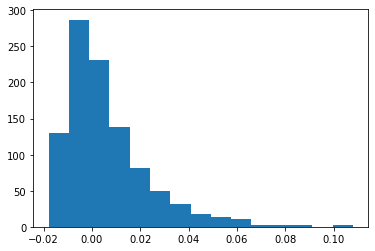

In [8]:
plt.hist(df.iloc[:, 3], bins=15)

(array([158., 320., 222., 126.,  71.,  51.,  16.,  13.,   7.,   8.,   2.,
          1.,   2.,   1.,   2.]),
 array([-0.01831582425661174, -0.009793130546194056,
        -0.0012704368357763715, 0.007252256874641313, 0.015774950585058997,
        0.024297644295476678, 0.032820338005894366, 0.041343031716312054,
        0.049865725426729735, 0.058388419137147415, 0.0669111128475651,
        0.07543380655798279, 0.08395650026840047, 0.09247919397881815,
        0.10100188768923585, 0.10952458139965351], dtype=object),
 <BarContainer object of 15 artists>)

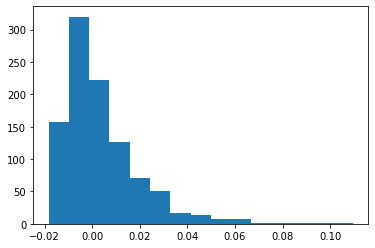

In [9]:
plt.hist(df.iloc[:, 4], bins=15)

In [10]:
import math
math.log2(10000) + 1

14.287712379549449

In [11]:
mc = MonteCarloResamplingOperator(shuffle_calculator)
mc.model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7e28d4a1da0a810e1bb74930cb25459a NOW.


In [12]:
items = df.iloc[:, 1]
item_size = len(items)
min_value = items.min()
items -= min_value
print(items)
print(items.min())
stan_data = {
    'N': item_size,
    'Y': items.values.tolist()
}

fit = mc.model.sampling(data=stan_data, iter=3000, chains=3, warmup=1000)

0      0.040733
1      0.037202
2      0.011394
3      0.003693
4      0.013277
         ...   
995    0.008727
996    0.013812
997    0.052599
998    0.075777
999    0.029371
Name: 1, Length: 1000, dtype: object
0.0


(array([250., 266., 157., 121.,  71.,  37.,  26.,  29.,  17.,  11.,   4.,
          6.,   0.,   2.,   3.]),
 array([0.0, 0.013012679048123482, 0.026025358096246964,
        0.039038037144370444, 0.05205071619249393, 0.06506339524061741,
        0.07807607428874089, 0.09108875333686438, 0.10410143238498785,
        0.11711411143311133, 0.13012679048123482, 0.1431394695293583,
        0.15615214857748178, 0.16916482762560525, 0.18217750667372876,
        0.19519018572185223], dtype=object),
 <BarContainer object of 15 artists>)

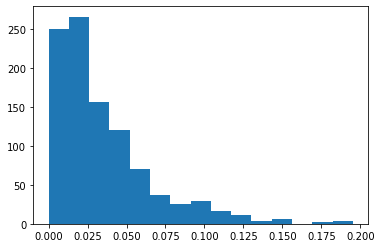

In [13]:
plt.hist(items, bins=15)

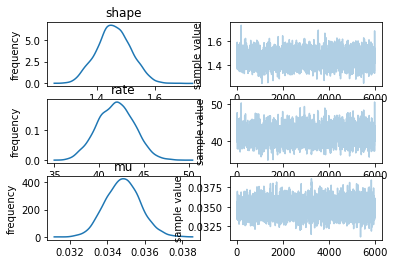

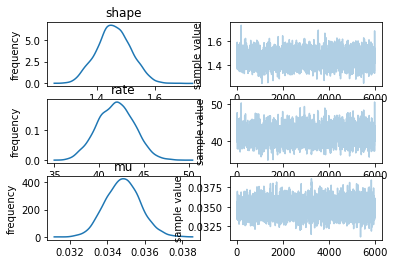

In [14]:
fit.plot()

In [15]:
fit

Inference for Stan model: anon_model_7e28d4a1da0a810e1bb74930cb25459a.
3 chains, each with iter=3000; warmup=1000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=6000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
shape   1.46  1.5e-3   0.06   1.34   1.42   1.46    1.5   1.57   1583    1.0
rate   41.87    0.05   2.05   37.9  40.43  41.88  43.26  45.83   1600    1.0
mu      0.03  1.3e-5 9.3e-4   0.03   0.03   0.03   0.04   0.04   4979    1.0
lp__  2398.7    0.02   1.03 2396.0 2398.3 2399.0 2399.4 2399.7   2108    1.0

Samples were drawn using NUTS at Sun Aug 15 23:59:07 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [16]:
np.mean(fit.extract('mu')['mu']) + min_value5

0.016812949493434984

In [ ]:
resampling = mc.resampling(df)
resampling 

In [ ]:
resampling.reshape(40, 40)